<a href="https://colab.research.google.com/github/mauro-nieva/Lint/blob/master/HPC/Velocidad_secuencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#1 Introduccion

Este cuaderno determina el vector velocidad resultado del desplazamiento en un determinado tiempo en 3 dimensiones. Su objetivo es utilizar Python[2] en la plataforma Colab [3] para resolver la problematica de manera secuancial y tener punto de comparacion para su contraparte en GPU.

Para poder describir un movimiento en tres dimensiones es necesario utilizar las cantidades vectoriales de desplazamiento, posición y velocidad.
El vector de posición de una partícula es un vector trazado desde el origen de un sistema de coordenadas hasta la posición de la partícula. La posición está dada por los componentes en cada eje (X, Y, Z).[1]

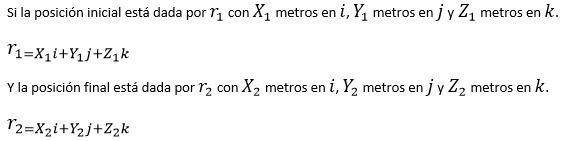

Entonces el desplazamiento está dado por:

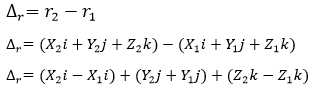

La velocidad es la derivada del desplazamiento con respecto al tiempo:

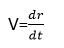

El cociente entre el desplazamiento y el intervalo de tiempo, es el vector de la velocidad media.

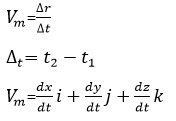

La velocidad está dada por la suma de las velocidades en cada componente.

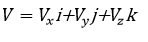

---
#2 Armado del ambiente

No son necesarios, ejecuciones previas del armado del ambiente.

---
#3 Desarrollo

In [5]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }


cantidad_N =   1#@param {type: "number"}
tiempo =   240#@param {type: "number"}

# --------------------------------------------

from datetime import datetime

tiempo_total = datetime.now()

import numpy
import sys

# --------------------------------------------
# Validacion de datos de entrada

try:
  if tiempo<1:
    raise Exception("tiempo incorrecto")
except Exception:
    sys.exit("El tiempo debe ser mayor a cero.") 

try:
  if cantidad_N<1:
    raise Exception("cantidad incorrecta")
except Exception:
    sys.exit("La cantidad de vectores debe ser mayor a cero.") 
    

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

# --------------------------------------------
# CPU - Defino la memoria de los vectores en cpu.

# Vector posicion inicial r1
x1_cpu = numpy.random.randn( cantidad_N )
x1_cpu = x1_cpu.astype( numpy.float32() )

y1_cpu = numpy.random.randn( cantidad_N )
y1_cpu = y1_cpu.astype( numpy.float32() )

z1_cpu = numpy.random.randn( cantidad_N )
z1_cpu = z1_cpu.astype( numpy.float32() )

# Vector posicion final r2
x2_cpu = numpy.random.randn( cantidad_N )
x2_cpu = x2_cpu.astype( numpy.float32() )

y2_cpu = numpy.random.randn( cantidad_N )
y2_cpu = y2_cpu.astype( numpy.float32() )

z2_cpu = numpy.random.randn( cantidad_N )
z2_cpu = z2_cpu.astype( numpy.float32() )

#Vector velocidad (resultado) V
vx_cpu = numpy.empty_like( x1_cpu )
vy_cpu = numpy.empty_like( y1_cpu )
vz_cpu = numpy.empty_like( z1_cpu )

# --------------------------------------------
# CPU - Realizo la función v= (r2-r1)/tiempo

tiempo_bucle = datetime.now()

for idx in range( 0, cantidad_N ):
  vx_cpu[idx] = (x2_cpu[idx] - x1_cpu[idx])/tiempo
  vy_cpu[idx] = (y2_cpu[idx] - y1_cpu[idx])/tiempo
  vz_cpu[idx] = (z2_cpu[idx] - z1_cpu[idx])/tiempo

tiempo_bucle = datetime.now() - tiempo_bucle

# --------------------------------------------
# CPU - Informo el resultado.


tiempo_total = datetime.now() - tiempo_total

print("Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )
print("Tiempo bucle: ", tiempo_en_ms( tiempo_bucle ), "[ms]" )

Tiempo Total:  1.156 [ms]
Tiempo bucle:  0.165 [ms]


---
#4 Tabla de pasos
Tabla de pasos de la ejecución del programa:

 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura del tamaño de vectores desde Colab.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo inicial.
CPU      |  numpy.random.randn( Cantidad_N ) | Inicializa los vectores r1, r2 y V.
CPU      |  for...                | Realiza la resta de los vectores (r2-r1) y divide por el tiempo, guardando el resultado en V. 
CPU      |  datetime.now()        | Toma el tiempo final.
CPU      |  print()               | Informa los resultados.

---
# 5 Conclusiones

Con respecto al modelo de GPU, este desarrollo secuencial para el calculo de la velocidad no varia mucho si se trata de pocos vectores a operar, como ventaja podriamos decir que el codigo es mas sencillo e intuitivo. Sin embargo, al aumentar considerablemente el numero de vectores claramente queda en desventaja.

---
# 6 Bibliografía

[1] Movimiento en tres dimensiones Fisica Aplicada: [Pagina YouTube](https://www.youtube.com/watch?reload=9&v=5LXGkZweXcs)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)